In [1]:
import streamlit as st

2022-05-11 23:37:58.196 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


In [2]:
import pandas as pd
import numpy as np


In [108]:
import get_marketplace_data as gmd
import importlib
importlib.reload(gmd)

<module 'get_marketplace_data' from '/Users/fliou/python_projects/decentraland_playground/get_marketplace_data.py'>

In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout

In [5]:
roads = pd.read_csv('roads.csv')

In [6]:
xx, yy = range(-150,151), range(-150,151)
XX,YY = np.meshgrid([x for x in xx], [y for y in yy])
XXYY = [i for i in zip(XX,YY)]

In [161]:
parcel_model = pd.read_csv('parcel_model.csv')
on_sale_parcels = gmd.get_on_sale_parcels()

last updated at: 2022-05-13


In [96]:
import yfinance
mana_price = yfinance.download('MANA-USD')


[*********************100%***********************]  1 of 1 completed


In [105]:
recent_mana = yfinance.Ticker('MANA-USD').history(period='2d', interval='1h')
(recent_mana.iloc[-1] - recent_mana.iloc[-25]).Close

0.3040279746055603

In [19]:
%%timeit -r 1 -n 1
xx, yy = range(-150,151), range(-150,151)
XX,YY = np.meshgrid([x for x in xx], [y for y in yy])
all_p = pd.DataFrame({'x': XX.flatten(), 'y': YY.flatten()})
CURRENT_MANA_PRICE = mana_price.iloc[-1].Close
TEN_DAY_AVG = 15000 / CURRENT_MANA_PRICE #In MANA
all_p = all_p.merge(on_sale_parcels[['x','y','price']], on=['x','y'], how='left')
all_p['price_usd'] = all_p.price * CURRENT_MANA_PRICE
all_p['norm_price'] = all_p.price / TEN_DAY_AVG
all_p = all_p.merge(parcel_model, on=['x','y'], how='left').rename(columns={'y_pred':'norm_price_pred'})
all_p['price_pred_usd'] = all_p.norm_price_pred * TEN_DAY_AVG * CURRENT_MANA_PRICE
all_p['p_ratio'] = all_p.norm_price / all_p.norm_price_pred

131 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [64]:
hovertext = ('x: ' + all_p.x.astype(str) + 
', y: ' + all_p.y.astype(str) + 
'<br />price ($): ' + all_p.price_usd.astype(str) +
'<br />predicted price ($): ' + all_p.price_pred_usd.astype(str) +
'<br />ratio: {}' + all_p.p_ratio.astype(str)
)

435 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [47]:
'x: {}, y: {}'.format(
all_p.x.astype(str), all_p.y.astype(str)
) + ''

'x: 0        -150\n1        -149\n2        -148\n3        -147\n4        -146\n         ... \n90596     146\n90597     147\n90598     148\n90599     149\n90600     150\nName: x, Length: 90601, dtype: object, y: 0        -150\n1        -150\n2        -150\n3        -150\n4        -150\n         ... \n90596     150\n90597     150\n90598     150\n90599     150\n90600     150\nName: y, Length: 90601, dtype: object'

In [40]:
'x: {}, y: {}<br />price ($): {}<br />predicted price ($): {}<br />ratio: {}'.format(
all_p.x.astype(str), all_p.y.astype(str), all_p.price_usd.astype(str), all_p.price_pred_usd.astype(str), all_p.p_ratio.astype(str)
)

'x: 0        -150\n1        -149\n2        -148\n3        -147\n4        -146\n         ... \n90596     146\n90597     147\n90598     148\n90599     149\n90600     150\nName: x, Length: 90601, dtype: object, y: 0        -150\n1        -150\n2        -150\n3        -150\n4        -150\n         ... \n90596     150\n90597     150\n90598     150\n90599     150\n90600     150\nName: y, Length: 90601, dtype: object<br />price ($): 0        nan\n1        nan\n2        nan\n3        nan\n4        nan\n        ... \n90596    nan\n90597    nan\n90598    nan\n90599    nan\n90600    nan\nName: price_usd, Length: 90601, dtype: object<br />predicted price ($): 0         10144.67963710078\n1         10144.67963710078\n2         10144.67963710078\n3         10144.67963710078\n4         10144.67963710078\n                ...        \n90596     13111.37780207889\n90597     13111.37780207889\n90598     13111.37780207889\n90599     13111.37780207889\n90600    13151.253082165595\nName: price_pred_usd, Len

In [35]:
%%timeit -r 1 -n 1


357 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
%%timeit -r 1 -n 1
hovertext = list(all_p.apply(lambda x: 'x: {}, y: {}<br />price ($): {}<br />predicted price ($): {}<br />ratio: {}'
                             .format(x.x, x.y, nround(x.price_usd), nround(x.price_pred_usd), nround(x.p_ratio,2)), axis='columns'))


7.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [70]:
nround(2.3122,0)

2

In [80]:
str(nround(all_p.iloc[132].price_usd))

'4489'

In [81]:
str(None)

'None'

In [75]:
all_p[~all_p.price_usd.isna()].head()

,x,y,price,price_usd,norm_price,norm_price_pred,price_pred_usd,p_ratio
132,-18,-150,6500.0,4489.334941,0.299289,0.731816,10977.242599,0.408967
570,119,-149,24899.0,17196.915491,1.146461,0.974256,14613.845153,1.176755
587,136,-149,12250.0,8460.669696,0.564045,0.972155,14582.327923,0.580200
591,140,-149,25000.0,17266.672850,1.151112,0.971181,14567.722113,1.185269
593,142,-149,24999.0,17265.982183,1.151065,0.968094,14521.416400,1.189001


In [93]:
abs(-1)

1

In [95]:
1 if False else 0

0

In [92]:
all_p.x - 1

0       -151
1       -150
2       -149
3       -148
4       -147
        ... 
90596    145
90597    146
90598    147
90599    148
90600    149
Name: x, Length: 90601, dtype: int64

In [89]:
all_p[(~all_p.price_usd.isna()) 
      & (all_p.price_usd < 10_000)]

,x,y,price,price_usd,norm_price,norm_price_pred,price_pred_usd,p_ratio
132,-18,-150,6500.0,4489.334941,0.299289,0.731816,10977.242599,0.408967
587,136,-149,12250.0,8460.669696,0.564045,0.972155,14582.327923,0.580200
1202,149,-147,5000.0,3453.334570,0.230222,0.965761,14486.420973,0.238384
1204,-150,-146,7788.0,5378.913926,0.358594,0.674190,10112.842837,0.531889
2030,74,-144,12000.0,8288.002968,0.552534,1.118093,16771.395791,0.494175
...,...,...,...,...,...,...,...,...
88583,-61,144,9999.0,6905.978473,0.460399,0.825795,12386.927979,0.557521
88918,-27,145,9999.0,6905.978473,0.460399,0.746010,11190.156260,0.617148
89548,1,147,9500.0,6561.335683,0.437422,0.681216,10218.242351,0.642120
89811,-37,148,10000.0,6906.669140,0.460445,0.663053,9945.796277,0.694431


In [84]:
def nround(n, m=0):
    try:
        if m == 0:
            return round(n)
        else:
            return round(n, m)
    except (ValueError, TypeError):
        return None

hovertext = ('x: ' + all_p.x.astype(str) + 
', y: ' + all_p.y.astype(str) + 
'<br />price ($): ' + nround(all_p.price_usd).astype(str) +
'<br />predicted price ($): ' + nround(all_p.price_pred_usd).astype(str) +
'<br />ratio: ' + nround(all_p.p_ratio,2).astype(str)
)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig = go.Figure(layout=layout)

fig.add_trace(go.Histogram2d(
    x=roads.x,
    y=roads.y,
    nbinsx=301,
    nbinsy=301,
    hoverinfo = 'skip',
    colorscale = ['#c5c9c7','#87ae73'],
    ))

fig.update_traces(showscale=False)

fig.add_trace(go.Heatmap(
    x=all_p.x,
    y=all_p.y,
    z=all_p.p_ratio,
    hoverinfo='text',
    text=hovertext,
    hoverongaps = False,
    colorscale = 'RdYlBu',
    reversescale = True,
    zmin = 0,
    zmid = 1,
    zmax = 2
))



fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
    visible =False
)

fig.update_xaxes(
    visible =False
)
fig.update_layout(
    width=600,
    height=600,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=10
    ),
  )



645 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [336]:
all_p.sort_values(by='p_ratio')[:10][['x','y','price_usd','price_pred_usd','p_ratio']]

,x,y,price_usd,price_pred_usd,p_ratio
17018,12,-94,14792.819879,59580.234375,0.248284
56737,-1,38,13914.754453,48648.769158,0.286025
49970,-146,16,5738.989711,20006.124933,0.286862
78372,-38,110,9756.282508,33371.606215,0.292353
27793,-49,-58,15940.617821,52424.983920,0.304065
81049,-70,119,10329.033682,32341.959867,0.319369
40608,124,-16,4987.182059,15213.442769,0.327814
40001,119,-18,4992.921048,15214.520858,0.328168
81382,-38,120,10312.964510,31404.696067,0.328389
46137,-66,3,5725.216136,17237.144053,0.332144


In [33]:
mana_price.iloc[-1].Close

1.14779794216156

In [30]:
stock = yf.Ticker("MANA-USD")
price = stock.info['regularMarketPrice']
print(price)

1.1517755


In [158]:
import get_marketplace_data as gmd
import importlib
importlib.reload(gmd)

<module 'get_marketplace_data' from '/Users/fliou/python_projects/decentraland_playground/get_marketplace_data.py'>

In [159]:
df = gmd.get_historic_parcels()

last updated at: 2022-05-13


In [160]:
df.price.mean()

5332.79381443299

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

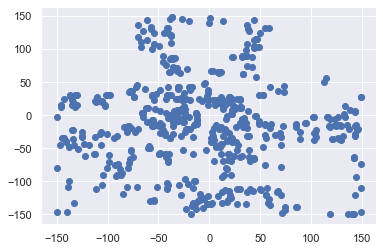

In [110]:
plt.scatter(on_sale_parcels.x,on_sale_parcels.y)

In [100]:
on_sale_parcels = pd.read_csv('on_sale_parcels.csv')

In [142]:
from datetime import datetime, timedelta
import time
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

In [137]:
days=10
now = (datetime.now()  - timedelta(days=days)).strftime('%s')

In [138]:
## Query string used to get latest parcel transaction information
mystring = """
{{
  orders (first: 1000 orderBy: updatedAt, orderDirection: asc where: {{ status:sold category:parcel updatedAt_gt:"{0}"}}, subgraphError: allow) {{
 
 
    category
    status
    price
    id
    updatedAt
    nft {{
      owner {{
        id
      }}
      name
      estate {{
        id
      }}
      parcel {{
        id
        x
        y
      }}
     
      owner {{
        id
      }}
    }}
   
  }}
 
}}"""

In [145]:
# Select your transport with a defined url endpoint
transport = RequestsHTTPTransport(url="https://api.thegraph.com/subgraphs/name/decentraland/marketplace")
# Create a GraphQL client using the defined transport
client = Client(transport=transport, fetch_schema_from_transport=True)

df = pd.DataFrame()

#update parameter used in mystring to start querying the database at the earliest update date of sale. The update 
#date is specified in epoch date and needs to be converted to datetime for human consumption.
update = now

while True:
    
    #query the data using GraphQL python library.
    query = gql(mystring.format(update))
    result = client.execute(query)
    
    #if there is no data returned it means you reached the end and should stop querying.
    if len(client.execute(query)['orders']) <= 1:
        break
   
    else:
        #Create a temporary dataframe to later append to the final dataframe that compiles all 1000-row dataframes.
        df1 = pd.DataFrame()
        df1 = pd.DataFrame(result['orders'])
        #unfold a subdict into a series of columns.
        df1 = df1.join(df1['nft'].apply(pd.Series),lsuffix='_1',rsuffix='_2')     
        
        #append your temp dataframe to your master dataset.
        df = df.append(df1)
        
        #Pass into the API the max date from your dataset to fetch the next 1000 records.
        update = df['updatedAt'].max()
        print("last updated at: {}".format(time.strftime('%Y-%m-%d', time.localtime(int(update)))))

#reformat the update date in human-readable datetime format.
df['updatedAt_dt'] = df['updatedAt'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(int(x))) )
df['price'] = df['price'].astype(float)/1e18
df['owner'] = df.owner.apply(lambda x: x['id'])
df['x'] = df.parcel.apply(lambda a: a['x'])
df['y'] = df.parcel.apply(lambda a: a['y'])
df['parcel_id'] = df.parcel.apply(lambda a: a['id'])
#df.to_csv('parcel_transactions.csv',index=False)

last updated at: 2022-05-13


In [169]:
df.updatedAt_dt

0     2022-05-03
1     2022-05-03
2     2022-05-03
3     2022-05-03
4     2022-05-03
         ...    
92    2022-05-12
93    2022-05-12
94    2022-05-13
95    2022-05-13
96    2022-05-13
Name: updatedAt_dt, Length: 97, dtype: object

In [179]:
mean_price = (df.groupby('updatedAt_dt').mean() 
                          .price.to_frame().reset_index())
mean_price['updatedAt_dt'] = mean_price.updatedAt_dt.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
mean_price = mean_price.set_index('updatedAt_dt')
mean_price = mean_price.join(mana_price.Close, how='left')
mean_price['mean_price_usd'] = mean_price.price * mean_price.Close
TEN_DAY_AVG = mean_price.mean_price_usd.mean()

In [180]:
TEN_DAY_AVG


6907.55011437576

In [166]:
mana_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.014329,0.016111,0.013886,0.015130,0.015130,653800
2017-11-10,0.015162,0.015734,0.012645,0.012940,0.012940,296429
2017-11-11,0.013201,0.013616,0.011758,0.011979,0.011979,237865
2017-11-12,0.011975,0.011975,0.010125,0.010505,0.010505,242761
2017-11-13,0.010628,0.011660,0.010628,0.011330,0.011330,225836
...,...,...,...,...,...,...
2022-05-09,1.328971,1.353529,1.078712,1.078712,1.078712,391182389
2022-05-10,1.077839,1.221053,1.035492,1.114494,1.114494,544489442
2022-05-11,1.114116,1.151775,0.759227,0.782168,0.782168,642808818
